In [1]:
from pybedtools import BedTool
import pybedtools
import pandas as pd
import numpy as np
import dask.dataframe as dd
import warnings
from pathlib import Path

warnings.filterwarnings("ignore")

pybedtools.set_tempdir("/storage/home/nmc6088/scratch")
pybedtools.helpers.set_bedtools_path("/storage/group/izg5139/default/nicole/miniconda3/bin")

df_centro = pd.read_table("/storage/group/izg5139/default/external/quadrupia_database/g4/nonBDNA/primates/centromeres/chm13v2.0_censat_v2.0.bed", 
                          usecols=range(4), 
                          skiprows=1, 
                          header=None, 
                          names=["seqID", "start", "end", "compartment"]
                         )
df_centro.loc[:, "compartment"] = df_centro["compartment"].str.split("_", expand=True)[0]

chrSizes = dd.read_table("/storage/group/izg5139/default/external/quadrupia_database/g4/nonBDNA/primates/chrSizes/chromosome_prim*.txt").compute()
chrSizes.loc[:, "#assembly_accession"] = chrSizes["#assembly_accession"].apply(lambda y: '.'.join(y.split('.')[:2]))

chromosomes = chrSizes[chrSizes['#assembly_accession'] == 'chm13v2.0']\
                .drop(columns=["#assembly_accession"])

df_centro = df_centro.merge(chromosomes, how="left", left_on="seqID", right_on="chromosome")

/tmp/ipykernel_1057768/3373844391.py:5: DeprecationWarning: The current Dask DataFrame implementation is deprecated. 
In a future release, Dask DataFrame will use a new implementation that
contains several improvements including a logical query planning.
The user-facing DataFrame API will remain unchanged.

The new implementation is already available and can be enabled by
installing the dask-expr library:

    $ pip install dask-expr

and turning the query planning option on:

    >>> import dask
    >>> dask.config.set({'dataframe.query-planning': True})
    >>> import dask.dataframe as dd

API documentation for the new implementation is available at
https://docs.dask.org/en/stable/dask-expr-api.html

Any feedback can be reported on the Dask issue tracker
https://github.com/dask/dask/issues 

To disable this warning in the future, set dask config:

    # via Python
    >>> dask.config.set({'dataframe.query-planning-warning': False})

    # via CLI
    dask config set dataframe.query-p

In [2]:
df_centro = pd.read_table("/storage/group/izg5139/default/external/quadrupia_database/g4/nonBDNA/primates/centromeres/chm13v2.0_censat_v2.0.bed", 
                          usecols=range(4), 
                          skiprows=1, 
                          header=None, 
                          names=["seqID", "start", "end", "compartment"]
                         )
df_centro.loc[:, "compartment"] = df_centro["compartment"].str.split("_", expand=True)[0]

chrSizes = dd.read_table("/storage/group/izg5139/default/external/quadrupia_database/g4/nonBDNA/primates/chrSizes/chromosome_prim*.txt").compute()
chrSizes.loc[:, "#assembly_accession"] = chrSizes["#assembly_accession"].apply(lambda y: '.'.join(y.split('.')[:2]))

chromosomes = chrSizes[chrSizes['#assembly_accession'] == 'chm13v2.0']\
                .drop(columns=["#assembly_accession"])

df_centro = df_centro.merge(chromosomes, how="left", left_on="seqID", right_on="chromosome")

In [3]:
human = Path("/storage/group/izg5139/default/DNA-Avoidmers/patterns/pattern_merged_abacaba/chm13v2.0_abacaba_words_length_50.all_seqs.txt")

df = pd.read_csv(human)
df

,seqID,start,end,sequence,length,type
0,chr1,6006,6066,ccagatgcaactgcccaatctcggacattccagctaccagtattgt...,60,abacaba
1,chr1,6007,6066,cagatgcaactgcccaatctcggacattccagctaccagtattgtg...,59,abacaba
2,chr1,6008,6066,agatgcaactgcccaatctcggacattccagctaccagtattgtga...,58,abacaba
3,chr1,6009,6066,gatgcaactgcccaatctcggacattccagctaccagtattgtgag...,57,abacaba
4,chr1,6010,6066,atgcaactgcccaatctcggacattccagctaccagtattgtgagc...,56,abacaba
...,...,...,...,...,...,...
24954857,chrM,15895,15947,ggtagctaaagtgaactgtatccgacatctggttcctacttcaggg...,52,abacaba
24954858,chrM,15896,15947,gtagctaaagtgaactgtatccgacatctggttcctacttcagggt...,51,abacaba
24954859,chrM,15897,15947,tagctaaagtgaactgtatccgacatctggttcctacttcagggtc...,50,abacaba
24954860,chrM,15903,15954,aagtgaactgtatccgacatctggttcctacttcagggtcataaag...,51,abacaba


In [4]:
df_merged = pd.read_table(
                        BedTool.from_dataframe(df[["seqID", "start", "end"]]).sort().merge().fn,
                        header=None,
                        names=["seqID", "start", "end"]
)
df_merged

,seqID,start,end
0,chr1,6006,6077
1,chr1,6167,6222
2,chr1,6324,6403
3,chr1,10330,10388
4,chr1,11500,11551
...,...,...,...
3457635,chrY,62450892,62450944
3457636,chrY,62452411,62452462
3457637,chrY,62452599,62452653
3457638,chrY,62453292,62453353


In [22]:
from tqdm import tqdm

chromosomes =  {
                1: 'NC_060925.1',
                2: 'NC_060926.1',	
                3: 'NC_060927.1',
                4: 'NC_060928.1',
                5: 'NC_060929.1',
                6: 'NC_060930.1',
                7: 'NC_060931.1',
                8: 'NC_060932.1',
                9: 'NC_060933.1',	
                10: 'NC_060934.1',	
                11: 'NC_060935.1',	
                12: 'NC_060936.1',		
                13: 'NC_060937.1',	
                14: 'NC_060938.1',
                15: 'NC_060939.1',		
                16: 'NC_060940.1',		
                17: 'NC_060941.1',	
                18: 'NC_060942.1',	
                19: 'NC_060943.1',	
                20: 'NC_060944.1',	
                21: 'NC_060945.1',	
                22: 'NC_060946.1',	
                'X': 'NC_060947.1',
                'Y': 'NC_060948.1'
}
chromosomes = {v: f'chr{k}' for k, v in chromosomes.items()}

human_gff = pd.read_table("/storage/group/izg5139/default/external/satellites/primates/gff/GCF_009914755.1_T2T-CHM13v2.0_genomic.gff.gz",
                          comment="#",
                          header=None,
                          names=["seqID", "source", "compartment", "start", "end", "score", "strand", "phase", "attributes"],
                         )
human_gff = human_gff[human_gff["compartment"].isin({"gene", "silencer", "CDS", "exon", "enhancer", "region"})].reset_index(drop=True)
human_gff = human_gff[["seqID", "start", "end", "compartment"]]
human_gff.loc[:, "start"] = human_gff["start"] - 1
human_gff.loc[:, "seqID"] = human_gff["seqID"].apply(lambda y: chromosomes[y])

compartments = ["region", "gene"] # "gene", "silencer", "CDS", "exon", "enhancer"]

merged_gff = []
for compartment in tqdm(compartments):
    limited_gff = BedTool.from_dataframe(human_gff[human_gff["compartment"] == compartment]).sort().merge(c=["4", "4"], o=["count", "distinct"])
    limited_gff = pd.read_table(limited_gff.fn, header=None, names=["seqID", "start", "end", "totalCompartments", "compartment"])
    # limited_gff.loc[:, "compartment"] = compartment

    merged_gff.append(limited_gff)

merged_gff = pd.concat(merged_gff, axis=0)
merged_gff["compartment"] = merged_gff["compartment"].apply(lambda x: x.capitalize() if x != "CDS" else x)\
                                                .replace("Region", "Genome")
merged_gff

100%|██████████| 2/2 [00:00<00:00,  3.57it/s]


,seqID,start,end,totalCompartments,compartment
0,chr1,0,248387328,1,Genome
1,chr10,0,134758134,1,Genome
2,chr11,0,135127769,1,Genome
3,chr12,0,133324548,1,Genome
4,chr13,0,113566686,1,Genome
...,...,...,...,...,...
27890,chrY,62159111,62204700,1,Gene
27891,chrY,62306324,62368760,1,Gene
27892,chrY,62422542,62435805,1,Gene
27893,chrY,62439552,62441822,1,Gene


In [23]:
merged_gff['compartment'].unique()

array(['Genome', 'Gene'], dtype=object)

In [24]:
df_compartments = pd.concat([merged_gff, 
                             df_centro.drop(columns=['chromosome'])], 
                            axis=0)\
                        .drop(columns=['totalCompartments', 'chrLen'])

df_compartments

,seqID,start,end,compartment
0,chr1,0,248387328,Genome
1,chr10,0,134758134,Genome
2,chr11,0,135127769,Genome
3,chr12,0,133324548,Genome
4,chr13,0,113566686,Genome
...,...,...,...,...
2518,chrY,62025776,62037362,censat
2519,chrY,62052955,62059882,censat
2520,chrY,62061431,62072743,hsat3
2521,chrY,62072743,62087298,bsat


In [25]:
satellite_compartments = list(df_compartments['compartment'].unique())
satellite_compartments

['Genome',
 'Gene',
 'ct',
 'censat',
 'hor',
 'dhor',
 'hsat2',
 'hsat3',
 'gsat',
 'bsat',
 'mon',
 'hsat1A',
 'hsat1B',
 'rDNA']

In [26]:
avoidmer_occurrences = df.groupby(["seqID", "length"], as_index=False)\
                         .agg(counts=("sequence", "count"))\
                        .sort_values(by=["counts"], ascending=False)
avoidmer_occurrences

,seqID,length,counts
0,chr1,50,353175
558,chr2,50,342006
1,chr1,51,295699
559,chr2,51,287825
744,chr3,50,276571
...,...,...,...
351,chr15,102,1
454,chr17,102,1
455,chr17,103,1
401,chr16,99,1


In [12]:
satellite_compartments = df_centro["compartment"].unique()

In [27]:
df.shape

(24954862, 6)

In [28]:
df_compartments_bed = BedTool.from_dataframe(df_compartments[["seqID", "start", "end", "compartment"]])
avoidmers_bed = BedTool.from_dataframe(df)


ValueError: Duplicate names are not allowed.

In [29]:
avoidmers_inter_df = pd.read_table(
                        avoidmers_bed.intersect(df_compartments_bed, wao=True).fn,
                        header=None,
                        names=list(df.columns) + ["chromosome", "compStart", "compEnd", "compartment", "overlap"]
                )
avoidmers_inter_df

,seqID,start,end,sequence,length,type,chromosome,compStart,compEnd,compartment,overlap
0,chr1,6006,6066,ccagatgcaactgcccaatctcggacattccagctaccagtattgt...,60,abacaba,chr1,0,248387328,Genome,60
1,chr1,6007,6066,cagatgcaactgcccaatctcggacattccagctaccagtattgtg...,59,abacaba,chr1,0,248387328,Genome,59
2,chr1,6008,6066,agatgcaactgcccaatctcggacattccagctaccagtattgtga...,58,abacaba,chr1,0,248387328,Genome,58
3,chr1,6009,6066,gatgcaactgcccaatctcggacattccagctaccagtattgtgag...,57,abacaba,chr1,0,248387328,Genome,57
4,chr1,6010,6066,atgcaactgcccaatctcggacattccagctaccagtattgtgagc...,56,abacaba,chr1,0,248387328,Genome,56
...,...,...,...,...,...,...,...,...,...,...,...
41595407,chrM,15895,15947,ggtagctaaagtgaactgtatccgacatctggttcctacttcaggg...,52,abacaba,.,-1,-1,.,0
41595408,chrM,15896,15947,gtagctaaagtgaactgtatccgacatctggttcctacttcagggt...,51,abacaba,.,-1,-1,.,0
41595409,chrM,15897,15947,tagctaaagtgaactgtatccgacatctggttcctacttcagggtc...,50,abacaba,.,-1,-1,.,0
41595410,chrM,15903,15954,aagtgaactgtatccgacatctggttcctacttcagggtcataaag...,51,abacaba,.,-1,-1,.,0


In [30]:
avoidmers_inter_df.shape

(41595412, 11)

In [31]:
avoidmers_inter_df.compartment.value_counts(normalize=True)

compartment
Genome    0.599937
Gene      0.337135
ct        0.041448
hor       0.007924
hsat1B    0.003420
hsat3     0.003172
hsat2     0.001978
rDNA      0.001496
censat    0.001490
bsat      0.001097
mon       0.000738
dhor      0.000082
gsat      0.000078
.         0.000006
Name: proportion, dtype: float64

In [32]:
df_chrY = avoidmers_inter_df[avoidmers_inter_df["seqID"] == "chrY"]
df_chrY

,seqID,start,end,sequence,length,type,chromosome,compStart,compEnd,compartment,overlap
40618154,chrY,7632,7684,tactgtggcgagctacatccgcagtccccaggaattcgtccgattg...,52,abacaba,chrY,0,62460029,Genome,52
40618155,chrY,7633,7684,actgtggcgagctacatccgcagtccccaggaattcgtccgattga...,51,abacaba,chrY,0,62460029,Genome,51
40618156,chrY,7634,7684,ctgtggcgagctacatccgcagtccccaggaattcgtccgattgat...,50,abacaba,chrY,0,62460029,Genome,50
40618157,chrY,11757,11810,gctaggattgcaggcctgagccaccgcgcccagctgccttgtgctt...,53,abacaba,chrY,0,62460029,Genome,53
40618158,chrY,11758,11810,ctaggattgcaggcctgagccaccgcgcccagctgccttgtgcttt...,52,abacaba,chrY,0,62460029,Genome,52
...,...,...,...,...,...,...,...,...,...,...,...
41595169,chrY,62453410,62453462,taaaatgtttcccggttgcagccatgaataatcaaggtgagagacc...,52,abacaba,chrY,0,62460029,Genome,52
41595170,chrY,62453411,62453462,aaaatgtttcccggttgcagccatgaataatcaaggtgagagacca...,51,abacaba,chrY,62452320,62453637,censat,51
41595171,chrY,62453411,62453462,aaaatgtttcccggttgcagccatgaataatcaaggtgagagacca...,51,abacaba,chrY,0,62460029,Genome,51
41595172,chrY,62453412,62453462,aaatgtttcccggttgcagccatgaataatcaaggtgagagaccag...,50,abacaba,chrY,62452320,62453637,censat,50


In [33]:
df_chrY.compartment.value_counts(normalize=True)

compartment
Genome    0.472361
Gene      0.180691
hsat1B    0.138003
hsat3     0.114310
ct        0.054197
censat    0.031377
bsat      0.008260
mon       0.000572
gsat      0.000155
hor       0.000074
Name: proportion, dtype: float64

In [14]:
chrSizes_homoS = chrSizes[chrSizes['#assembly_accession'] == 'chm13v2.0'].drop(columns=['#assembly_accession'])
chrSizes_homoS

,chromosome,chrLen
0,chr1,248387328
1,chr2,242696752
2,chr3,201105948
3,chr4,193574945
4,chr5,182045439
5,chr6,172126628
6,chr7,160567428
7,chr8,146259331
8,chr9,150617247
9,chr10,134758134


In [59]:
mutations_df = pd.read_table(
                            "/storage/group/izg5139/default/external/satellites/primates/hprc-v1.1-mc-chm13.vcfbub.a100k.wave.vcf.gz", 
                             comment="#", 
                             header=None,
                             usecols=[0, 1, 2, 3, 4, 5, 6, 7],
                             names=[
                                    "seqID", 
                                    "pos", 
                                    "info", 
                                    "allele", 
                                    "variant", 
                                    "quality", 
                                    "wtf", 
                                    "metadata"
                                 ],
                             dtype={"pos": int}
                        )
mutations_df.loc[:, "transition"] = mutations_df["allele"] + "->" + mutations_df["variant"]
mutations_df

,seqID,pos,info,allele,variant,quality,wtf,metadata,transition
0,chr1,1,>74114>73202_10,C,CCACCTAACCCTAACCCTACCTAACCCTAACCCTAACCCTAACCCT...,60,.,AC=1;AF=0.142857;AN=7;AT=>74114<74109>74108<74...,C->CCACCTAACCCTAACCCTACCTAACCCTAACCCTAACCCTAAC...
1,chr1,1,>74114>73202_11,CACCCTAAACCC,C,60,.,AC=2;AF=0.285714;AN=7;AT=>74114>74113>74106>74...,CACCCTAAACCC->C
2,chr1,1,>74114>73202_12,CACCCTAAACCCTAACCCC,C,60,.,AC=2;AF=0.285714;AN=7;AT=>74114>74113>74111<74...,CACCCTAAACCCTAACCCC->C
3,chr1,1,>74114>73202_13,CACCCTAAACCCTAACCCCTAACCCTAACCCTAACCCTAACCCTAA...,C,60,.,AC=1;AF=0.142857;AN=7;AT=>74114>74105>74103>73...,CACCCTAAACCCTAACCCCTAACCCTAACCCTAACCCTAACCCTAA...
4,chr1,6,>74114>73202_36,T,TTCCCCCCCACCCCCACCCCCACCCCCACCCCCACCCCCTCCCCCA...,60,.,AC=1;AF=0.142857;AN=7;AT=>74114>74113>74106>74...,T->TTCCCCCCCACCCCCACCCCCACCCCCACCCCCACCCCCTCCC...
...,...,...,...,...,...,...,...,...,...
31037034,chrY,26673146,>94795637>94795626_4,G,T,60,.,AC=2;AF=0.222222;AN=9;AT=>94795637>94795626;NS...,G->T
31037035,chrY,26673151,>94795637>94795626_5,G,T,60,.,AC=1;AF=0.111111;AN=9;AT=>94795637>94795636<94...,G->T
31037036,chrY,26673210,>94795626>94795623_1,A,AGTGGACTGGAGTGCAGAGGAATGGAGTGGAGTGAAGTCCAGTTGA...,60,.,AC=1;AF=0.2;AN=5;AT=>94795626<94825864<9482586...,A->AGTGGACTGGAGTGCAGAGGAATGGAGTGGAGTGAAGTCCAGT...
31037037,chrY,26673210,>94795626>94795623_2,A,AGTGGACTGGAGTGCAGAGGAATGGAGTGGAGTGAAGTCCAGTTGA...,60,.,AC=2;AF=0.4;AN=5;AT=>94795626<94825864<9482586...,A->AGTGGACTGGAGTGCAGAGGAATGGAGTGGAGTGAAGTCCAGT...


In [62]:
mutations_df[mutations_df["transition"].isna()]

,seqID,pos,info,allele,variant,quality,wtf,metadata,transition
13390630,chr2,31636540,>40504645>40504648_1,AG,NaN,60,.,AC=1;AF=0.011236;AN=89;AT=>40504645>40504647>4...,NaN
16864525,chr21,30152769,>51351141>51351144_2,CC,NaN,60,.,AC=1;AF=0.011236;AN=89;AT=>51351141>51351143>5...,NaN


In [63]:
mutations_df.dropna(subset=['transition'], inplace=True)

In [64]:
def determine_type(x):
    allele, variant = x.split("->")
    if len(allele) == len(variant):
        return "SNP"

    if len(allele) < len(variant):
        return "INS"

    if len(allele) > len(variant):
        return "DEL"

    return "MNP"

In [65]:
mutations_df.loc[:, "type"] = mutations_df["transition"].apply(determine_type)

#### Multiple Variants Splitting

In [69]:
mutations_df_sans = mutations_df[~mutations_df["variant"].str.contains(",")]
mutations_df.shape, mutations_df_sans.shape

((31037037, 11), (30951785, 11))

In [71]:
# mutations_df_sans.loc[:, "AN"] = mutations_df_sans["metadata"].apply(lambda x: int(x.split("AN=")[1].split(";")[0]))
# mutations_df.loc[:, "AC"] = mutations_df["metadata"].apply(lambda x: float(x.split("AC=")[1].split(";")[0]))
# mutations_df_sans.loc[:, "AF"] = mutations_df_sans["metadata"].apply(lambda x: float(x.split("AF=")[1].split(";")[0]))

In [72]:
mutations_df_sans.loc[:, "start"] = mutations_df_sans["pos"] - 1
mutations_df_sans.loc[:, "end"] = mutations_df_sans["start"] + 1

In [84]:
df_all_merged = pd.read_table(
                BedTool.from_dataframe(df_all[df_all['length'] >= 70][["seqID", "start", "end"]])\
                    .sort()\
                    .merge(c="3", o="count").fn,
            header=None,
            names=["seqID", "start", "end", "totalAvoidmers"]
            )
df_all_merged.loc[:, "length"] = df_all_merged["end"] - df_all_merged["start"]
df_all_merged = df_all_merged.merge(chrSizes_homoS, left_on="seqID", right_on="chromosome", how="left")
df_all_merged.loc[:, "acrocentric"] = df_all_merged["seqID"].apply(lambda x: "Acrocentric" if x in acrocentric else "Other")
df_all_merged

,seqID,start,end,totalAvoidmers,length,chromosome,chrLen,acrocentric
0,chr1,81078,81150,3,72,chr1,248387328,Other
1,chr1,157149,157242,24,93,chr1,248387328,Other
2,chr1,180022,180092,1,70,chr1,248387328,Other
3,chr1,202906,202983,8,77,chr1,248387328,Other
4,chr1,240458,240537,10,79,chr1,248387328,Other
...,...,...,...,...,...,...,...,...
62440,chrY,62182596,62182667,2,71,chrY,62460029,Other
62441,chrY,62269011,62269085,5,74,chrY,62460029,Other
62442,chrY,62293049,62293127,9,78,chrY,62460029,Other
62443,chrY,62314431,62314503,3,72,chrY,62460029,Other


In [180]:
mutations_bed_cov = BedTool.from_dataframe(mutations_df_sans[["seqID", "start", "end", "type"]])

In [165]:
df_all_merged_bed = BedTool.from_dataframe(df_all_merged[["seqID", "start", "end"]])

<BedTool(/storage/home/nmc6088/scratch/pybedtools.2yo64hdp.tmp)>

In [179]:
centro_bed = BedTool.from_dataframe(df_centro)

In [255]:
coverage_centro_df_all = []

for type in tqdm(["SNP", "DEL", "INS"]):
    mutations_bed_cov = BedTool.from_dataframe(mutations_df_sans[mutations_df_sans["type"] == type][["seqID", "start", "end"]])
    coverage_centro_df = pd.read_table(
                        centro_bed.coverage(mutations_bed_cov, wao=True).fn,
                       header=None,
                        names=["seqID", "start", "end", "compartment", "totalHits", "overlappingBP", "compartmentLength", "coverage"]
                )
    coverage_centro_df.loc[:, "type"] = type
    coverage_centro_df_all.append(coverage_centro_df)
    
coverage_centro_df_all = pd.concat(coverage_centro_df_all, axis=0)
coverage_centro_df_all

100%|██████████| 3/3 [01:03<00:00, 21.02s/it]


,seqID,start,end,compartment,totalHits,overlappingBP,compartmentLength,coverage,type
0,chr1,7506,138480,gene,3771,3682,130974,0.028112,SNP
1,chr1,152269,205171,gene,817,811,52902,0.015330,SNP
2,chr1,205335,238971,gene,376,376,33636,0.011178,SNP
3,chr1,246378,248841,gene,23,23,2463,0.009338,SNP
4,chr1,255178,256494,gene,23,22,1316,0.016717,SNP
...,...,...,...,...,...,...,...,...,...
690424,chrY,62025776,62037362,censat,0,0,11586,0.000000,INS
690425,chrY,62052955,62059882,censat,0,0,6927,0.000000,INS
690426,chrY,62061431,62072743,hsat3,0,0,11312,0.000000,INS
690427,chrY,62072743,62087298,bsat,0,0,14555,0.000000,INS


In [256]:
coverage_grouped_centro = coverage_centro_df_all.groupby(["compartment", "type"], as_index=False)\
                      .agg(totalCovering=("overlappingBP", "sum"),
                           compLength=("compartmentLength", "sum")
                          )\
                    .assign(coverage=lambda ds: 1e6 * ds['totalCovering'].div(ds['compLength']))
coverage_grouped_centro

,compartment,type,totalCovering,compLength,coverage
0,CDS,DEL,8531,36194612,235.698065
1,CDS,INS,12051,36194612,332.950109
2,CDS,SNP,188318,36194612,5202.929099
3,bsat,DEL,12649,8609737,1469.150568
4,bsat,INS,11834,8609737,1374.490301
5,bsat,SNP,179161,8609737,20809.114146
6,censat,DEL,11702,8912512,1312.985609
7,censat,INS,10877,8912512,1220.419114
8,censat,SNP,105186,8912512,11802.059846
9,ct,DEL,281248,211349033,1330.727640


Text(0.5, 0, '')

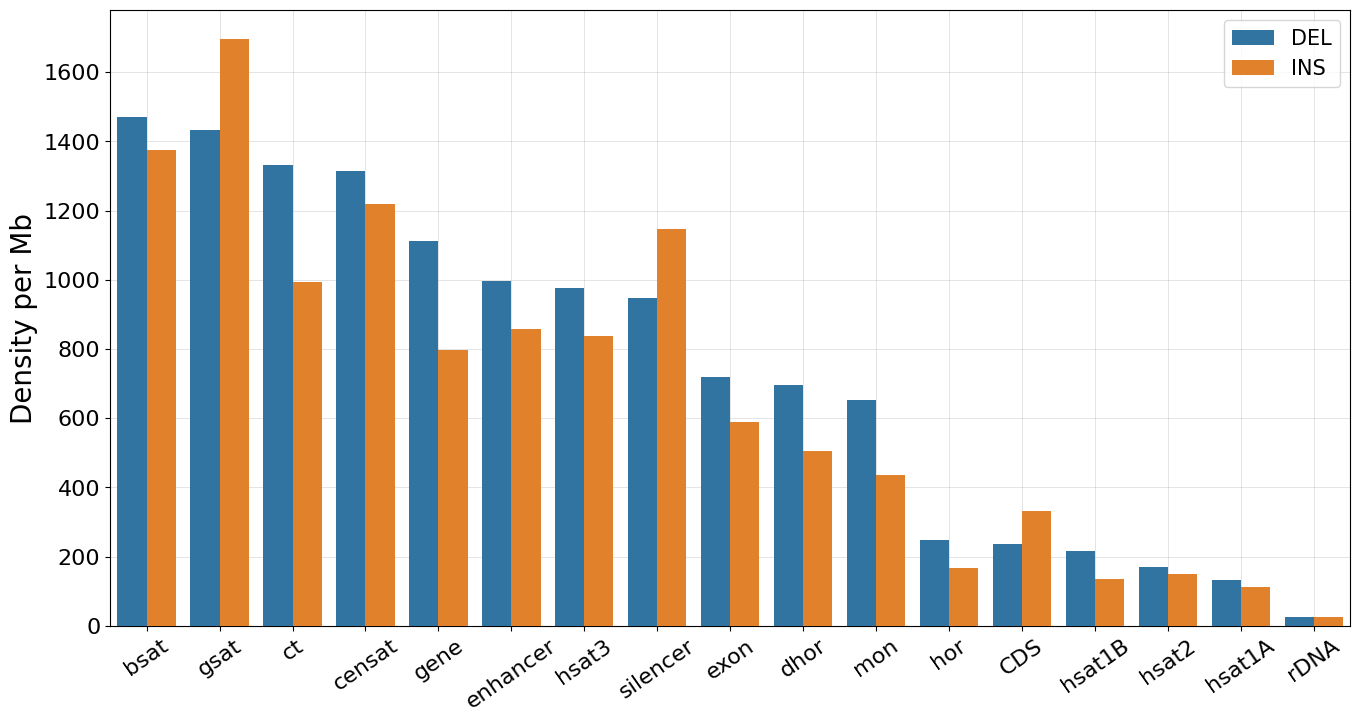

In [474]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 8))
temp = coverage_grouped_centro[coverage_grouped_centro["type"] != "SNP"]
sns.barplot(data=temp, 
                capsize=0.3, 
                x="compartment",
                y="coverage", 
                # palette=palette,
                hue="type",
                # dodge=False,
                # width=0.9,
            ax=ax, 
            order=temp[temp["type"] == "DEL"].sort_values(by=["coverage"], ascending=False)['compartment'].tolist(),
            zorder=3)
ax.grid(lw=0.4, alpha=0.6, zorder=0)
ax.legend(title="", prop={"size": 15})
ax.tick_params(axis="both", labelsize=16)
ax.tick_params(axis="x", rotation=35)
ax.yaxis.label.set_size(20)
ax.set_ylabel("Density per Mb")
ax.set_xlabel("")

# save_location = Path("/storage/group/izg5139/default/external/zimie")
# save_location.mkdir(exist_ok=True)
# fig.savefig(f"{save_location}/avoidmer_density_per_chromosome_compartment_70bp.png", bbox_inches='tight')

Text(0.5, 0, '')

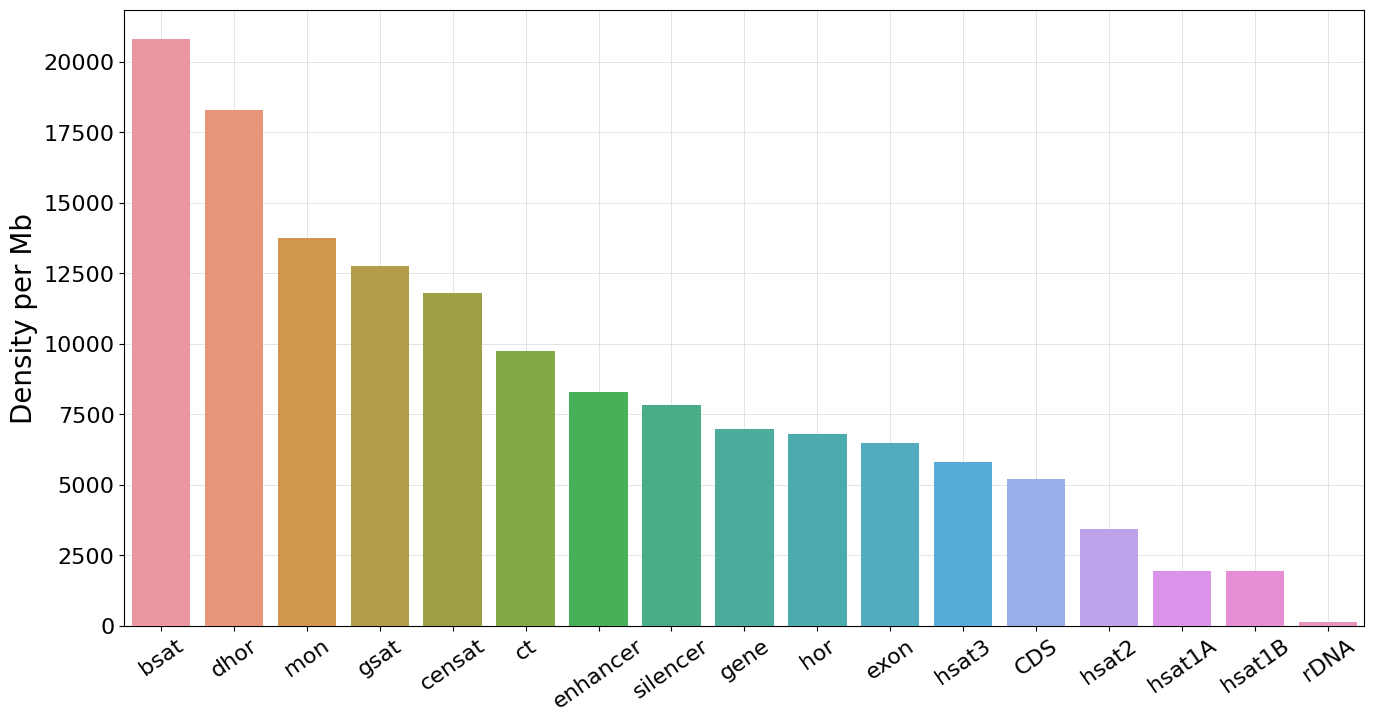

In [269]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 8))
temp = coverage_grouped_centro[coverage_grouped_centro["type"] == "SNP"]
sns.barplot(data=temp, 
                capsize=0.3, 
                x="compartment",
                y="coverage", 
                # palette=palette,
                # dodge=False,
                # width=0.9,
            ax=ax, 
            order=temp.sort_values(by=['coverage'], ascending=False)['compartment'],
            zorder=3)
ax.grid(lw=0.4, alpha=0.6, zorder=0)
ax.tick_params(axis="both", labelsize=16)
ax.tick_params(axis="x", rotation=35)
ax.yaxis.label.set_size(20)
ax.set_ylabel("Density per Mb")
ax.set_xlabel("")

## Mutation Overlap with Avoidmers

In [194]:
mutations_bed_cov = BedTool.from_dataframe(mutations_df_sans[["seqID", "start", "end", "type"]])

df_inter = pd.read_table(
    df_all_merged_bed.intersect(mutations_bed_cov, wo=True).fn,
    header=None,
    usecols=[0, 1, 2, 4, 5, 6, 7],
    names=["seqID", "start", "end", "mutStart", "mutEnd", "mutType", "overlap"]
)
df_inter

,seqID,start,end,mutStart,mutEnd,mutType,overlap
0,chr1,81078,81150,81081,81082,SNP,1
1,chr1,81078,81150,81121,81122,SNP,1
2,chr1,157149,157242,157227,157228,SNP,1
3,chr1,157149,157242,157229,157230,SNP,1
4,chr1,180022,180092,180057,180058,SNP,1
...,...,...,...,...,...,...,...
34692,chrY,24845214,24845286,24845218,24845219,INS,1
34693,chrY,24890618,24890691,24890636,24890637,SNP,1
34694,chrY,25219695,25219765,25219717,25219718,SNP,1
34695,chrY,26512280,26512360,26512306,26512307,DEL,1


In [195]:
df_inter.loc[:, "length"] = df_inter["end"] - df_inter["start"]

In [270]:
grouped_inter_df = df_inter.groupby(["seqID", "mutType", "start", "end"], as_index=False)\
        .agg(overlap=("overlap", "sum"),
                length=("length", "first"),
            )\
        .groupby(["seqID", "mutType"], as_index=False)\
        .agg(
             overlap=("overlap", "sum"),
             length=("length", "sum")
            )\
        .assign(density=lambda ds: 1e2 * ds['overlap'].div(ds['length']))\
        .pivot(index="seqID", columns="mutType", values="density")

grouped_inter_df

mutType,DEL,INS,SNP
seqID,,,
chr1,1.429268,1.592798,1.856925
chr10,1.635931,1.770538,1.842165
chr11,1.501502,1.509186,1.784002
chr12,1.498371,1.607477,1.761287
chr13,1.353503,1.906874,1.832315
chr14,1.569430,1.563111,2.049691
chr15,1.315789,1.333333,1.871667
chr16,1.404330,1.504149,1.933990
chr17,1.516070,1.646341,2.403570


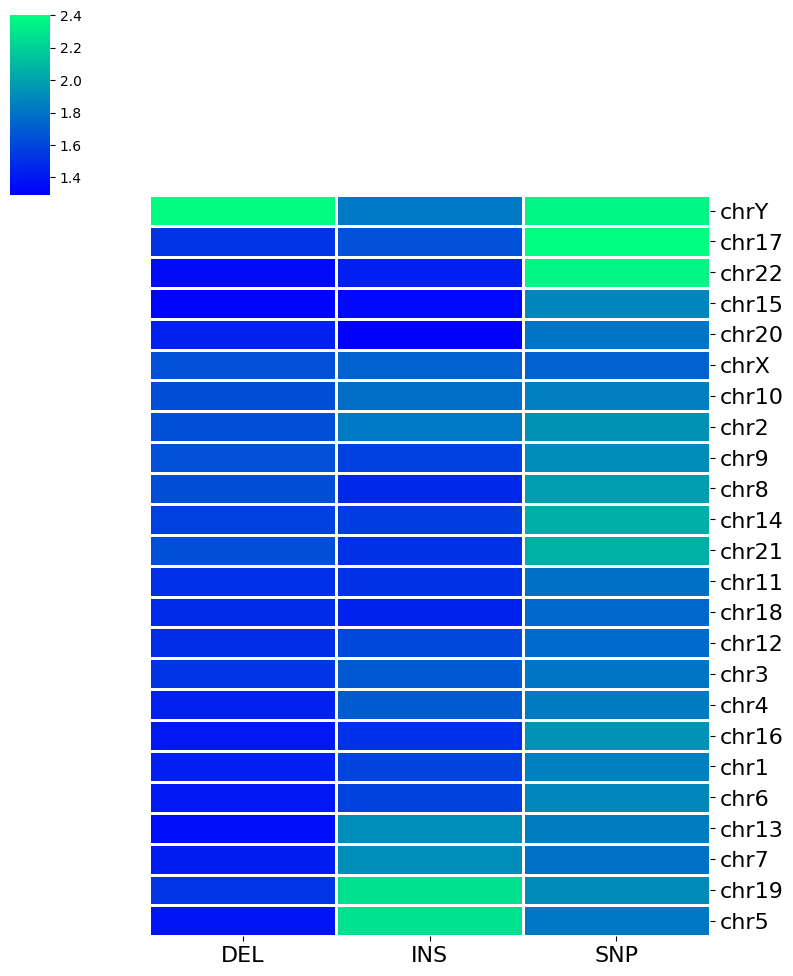

In [346]:
# fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 10))
cg = sns.clustermap(
            data=grouped_inter_df, 
            cmap="winter", 
            linecolor='white', 
            col_cluster=False,
            linewidth=2.0, 
            figsize=(8, 10)
              )
cg.ax_row_dendrogram.set_visible(False)
cg.ax_col_dendrogram.set_visible(False)
ax = cg.ax_heatmap
ax.set_ylabel("")
ax.set_xlabel("")
ax.tick_params(axis="y", labelsize=16)
ax.tick_params(axis="x", labelsize=16)

In [178]:
mutation_types = mutations_df_sans['type'].unique()

coverage_df = []
for typ in tqdm(mutation_types):
    mutations_bed_cov = BedTool.from_dataframe(mutations_df_sans[mutations_df_sans["type"] == type][["seqID", "start", "end"]])
    mut_intersection = pd.read_table(
                        df_all_merged_bed.coverage(mutations_bed_cov).fn,
                        header=None,
                        names=["seqID", 
                               "start", 
                               "end", 
                               "totalHits", 
                               "bpCovering", 
                               "compartmentLength", 
                               "coverage", 
                            ],
                )
    mut_intersection.loc[:, "type"] = typ
    coverage_df.append(mut_intersection)

coverage_df = pd.concat(coverage_df, axis=0)
coverage_df

100%|██████████| 3/3 [00:04<00:00,  1.57s/it]


,seqID,start,end,totalHits,bpCovering,compartmentLength,coverage,type
0,chr1,81078,81150,0,0,72,0.0,INS
1,chr1,157149,157242,0,0,93,0.0,INS
2,chr1,180022,180092,0,0,70,0.0,INS
3,chr1,202906,202983,0,0,77,0.0,INS
4,chr1,240458,240537,0,0,79,0.0,INS
...,...,...,...,...,...,...,...,...
62440,chrY,62182596,62182667,0,0,71,0.0,SNP
62441,chrY,62269011,62269085,0,0,74,0.0,SNP
62442,chrY,62293049,62293127,0,0,78,0.0,SNP
62443,chrY,62314431,62314503,0,0,72,0.0,SNP


In [190]:
coverage_df.loc[:, "length"] = coverage_df["end"] - coverage_df["start"]

In [192]:
grouped_coverage = coverage_df.groupby(["seqID", "type"], as_index=False)\
                              .agg(totalCounts=("totalHits", "sum"),
                                    compLength=("length", "sum")
                                  )
grouped_coverage.loc[:, "coverage"] = 1e6 * grouped_coverage["totalCounts"].div(grouped_coverage["compLength"])
grouped_coverage.sort_values(by=['coverage'], ascending=False)

,seqID,type,totalCounts,compLength,coverage
56,chr6,SNP,0,239754,0.0
57,chr7,DEL,0,220708,0.0
58,chr7,INS,0,220708,0.0
59,chr7,SNP,0,220708,0.0
60,chr8,DEL,0,211676,0.0
...,...,...,...,...,...
3,chr10,DEL,0,204446,0.0
4,chr10,INS,0,204446,0.0
5,chr10,SNP,0,204446,0.0
6,chr11,DEL,0,195786,0.0


# Positioning of Avoidmers relative to SNP + INDELS

In [102]:
window = 500
mutations_df_sans.loc[:, "start_window"] = np.maximum(mutations_df_sans["start"] -  window, 0)
mutations_df_sans.loc[:, "end_window"] = mutations_df_sans["start"] + window + 1

In [103]:
mutations_bed = BedTool.from_dataframe(mutations_df_sans[["seqID", "start_window", "end_window", "type"]])
mutations_bed

<BedTool(/storage/home/nmc6088/scratch/pybedtools.px7klxfl.tmp)>

In [104]:
df_all_merged_bed = BedTool.from_dataframe(df_all_merged[["seqID", "start", "end"]])
df_all_merged_bed

<BedTool(/storage/home/nmc6088/scratch/pybedtools.12aqjkhm.tmp)>

In [105]:
mut_intersection = pd.read_table(
                        mutations_bed.intersect(df_all_merged_bed, wo=True).fn,
                        header=None,
                        names=["seqID", "start", "end", "type", "chromosome", "motifStart", "motifEnd", "overlap"],
                )
mut_intersection

,seqID,start,end,type,chromosome,motifStart,motifEnd,overlap
0,chr1,80118,81119,SNP,chr1,81078,81150,41
1,chr1,80187,81188,SNP,chr1,81078,81150,72
2,chr1,80257,81258,SNP,chr1,81078,81150,72
3,chr1,80286,81287,SNP,chr1,81078,81150,72
4,chr1,80450,81451,SNP,chr1,81078,81150,72
...,...,...,...,...,...,...,...,...
602597,chrY,26464782,26465783,DEL,chrY,26465170,26465242,72
602598,chrY,26511581,26512582,DEL,chrY,26512280,26512360,80
602599,chrY,26511806,26512807,DEL,chrY,26512280,26512360,80
602600,chrY,26511808,26512809,SNP,chrY,26512280,26512360,80


In [106]:
mut_intersection.overlap.sum()

41686147

In [107]:
mut_intersection['type'].value_counts()

type
SNP    459045
INS     78364
DEL     65193
Name: count, dtype: int64

In [108]:
def extract_PWM(intersect_df, window_size):
    total_counts = [0 for _ in range(2*window_size+1)]
    # total_counts = [0 for _ in range(2*window_size+1)]

    strand = "+"
    total_overlap = 0
    for _, row in intersect_df.iterrows():
        
        start = int(row['start'])
        end = int(row['end'])
        motif_start = int(row['motifStart'])
        motif_end = int(row['motifEnd'])
        overlap = int(row['overlap'])
        
        total_overlap += overlap
        origin = end - window_size - 1
        L = max(0, window_size - (origin - motif_start))
        U = min(2 * window_size + 1, window_size - (origin - motif_end))

        assert L <= U
        overlap_start = max(motif_start, start)
        overlap_end = min(motif_end, end)
        overlap_length = overlap_end - overlap_start
        assert overlap == overlap_length

        # overlapping_sequence = sequence[max(0, start-motif_start): min(end-motif_start, len(sequence))]
        # assert len(overlapping_sequence) == overlap == U-L

        for idx, pos in enumerate(range(L, U)):
            if strand == "-":
                index = 2 * window_size - pos
            else:
                index = pos

            # nucl = overlapping_sequence[idx]
            total_counts[index] += 1

    # assert total_overlap == sum(sum(v) for v in total_counts.values())
    assert total_overlap == sum(total_counts), f"Overlap: {total_overlap}; totalCounts: {sum(total_counts)}."
    
    return total_counts

In [116]:
mutation_types = mut_intersection['type'].unique()
total_counts_all = []
for typ in tqdm(mutation_types):
    total_counts = extract_PWM(mut_intersection[mut_intersection['type'] == typ], window_size=window)
    total_counts_df = pd.DataFrame(total_counts, columns=["mutationBurden"]).reset_index().rename(columns={"index": "pos"})
    total_counts_df.loc[:, "pos"] = total_counts_df["pos"] - window
    total_counts_df.loc[:, "type"] = typ
    total_counts_all.append(total_counts_df)
    
total_counts_all = pd.concat(total_counts_all, axis=0)
total_counts_all

100%|██████████| 3/3 [00:24<00:00,  8.24s/it]


,pos,mutationBurden,type
0,-500,32038,SNP
1,-499,32087,SNP
2,-498,32046,SNP
3,-497,32061,SNP
4,-496,32106,SNP
...,...,...,...
996,496,5793,INS
997,497,5817,INS
998,498,5830,INS
999,499,5865,INS


In [134]:
total_counts_all_window_mean = total_counts_all.groupby("type", as_index=False)\
                                               .agg(mutationBurdenAverage=("mutationBurden", "mean")) 
total_counts_all_window_mean

,type,mutationBurdenAverage
0,DEL,4474.242757
1,INS,5394.696304
2,SNP,31775.563437


In [135]:
total_counts_all = total_counts_all.merge(total_counts_all_window_mean, on="type")
total_counts_all.loc[:, "mutationBurdenEnrichment"] = total_counts_all["mutationBurden"].div(total_counts_all["mutationBurdenAverage"])
total_counts_all

,pos,mutationBurden,type,mutationBurdenEnrichment,mutationBurdenAverage
0,-500,32038,SNP,1.008259,31775.563437
1,-499,32087,SNP,1.009801,31775.563437
2,-498,32046,SNP,1.008511,31775.563437
3,-497,32061,SNP,1.008983,31775.563437
4,-496,32106,SNP,1.010399,31775.563437
...,...,...,...,...,...
2998,496,5793,INS,1.073832,5394.696304
2999,497,5817,INS,1.078281,5394.696304
3000,498,5830,INS,1.080691,5394.696304
3001,499,5865,INS,1.087179,5394.696304


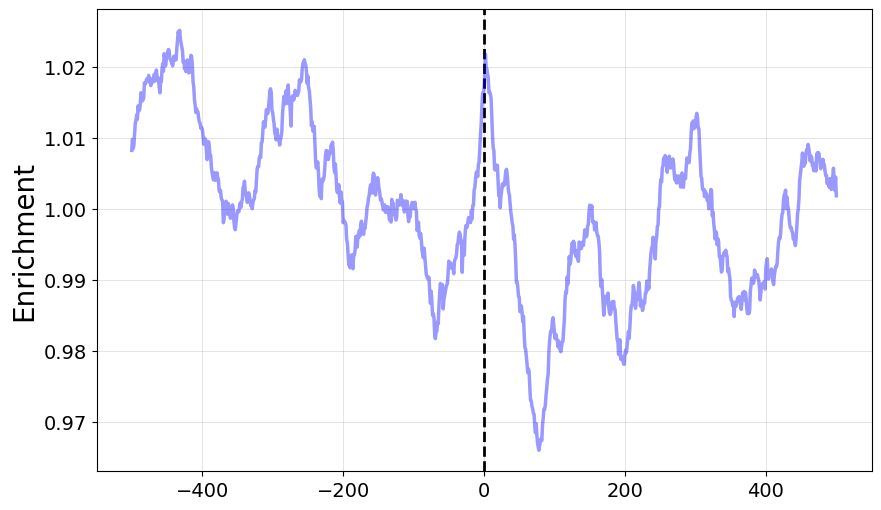

In [478]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))
sns.lineplot(
         data=total_counts_all[total_counts_all["type"] == "SNP"],
         x="pos",
         y="mutationBurdenEnrichment",
         # linestyle='--',
         color='blue',
        alpha=0.4,
         lw=2.5,
         ax=ax,
         zorder=3,
        )
ax.axvline(0, linestyle='--', color='black', lw=2.0)
ax.tick_params(axis="both", labelsize=14)
# ax.legend(title="", prop={"size": 12})
ax.grid(lw=0.4, alpha=0.6, zorder=0)
ax.set_axisbelow(True)
ax.set_xlabel("")
ax.set_ylabel("Enrichment")
ax.yaxis.label.set_size(20)
plt.show()
plt.close()

save_location = Path("/storage/group/izg5139/default/external/zimie")
save_location.mkdir(exist_ok=True)
fig.savefig(f"{save_location}/avoidmer_SNP_positioning.png", bbox_inches='tight')

In [137]:
total_counts_all[total_counts_all["type"] != "SNP"]

,pos,mutationBurden,type,mutationBurdenEnrichment,mutationBurdenAverage
1001,-500,5120,DEL,1.144328,4474.242757
1002,-499,5126,DEL,1.145669,4474.242757
1003,-498,5120,DEL,1.144328,4474.242757
1004,-497,5100,DEL,1.139858,4474.242757
1005,-496,5097,DEL,1.139187,4474.242757
...,...,...,...,...,...
2998,496,5793,INS,1.073832,5394.696304
2999,497,5817,INS,1.078281,5394.696304
3000,498,5830,INS,1.080691,5394.696304
3001,499,5865,INS,1.087179,5394.696304


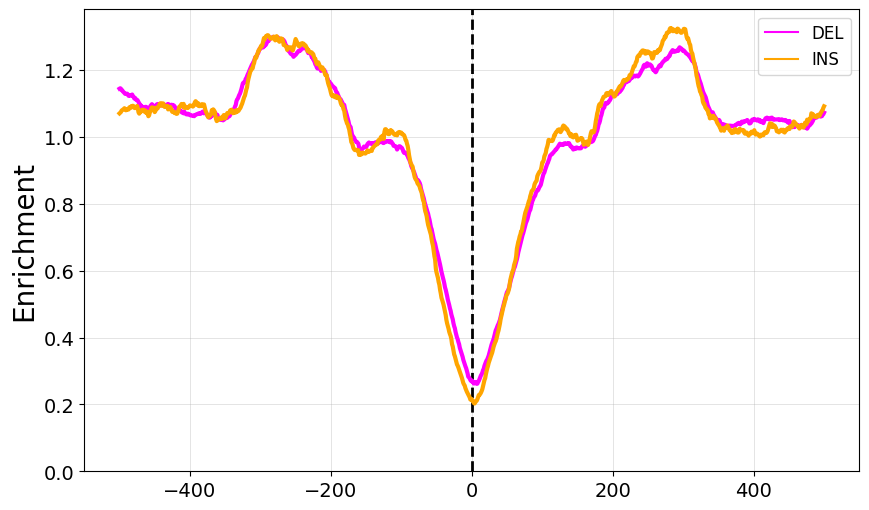

In [479]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))
sns.lineplot(
         data=total_counts_all[total_counts_all["type"] != "SNP"],
         x="pos",
         hue="type",
         y="mutationBurdenEnrichment",
         # linestyle='--',
         palette={
                  "DEL": "magenta",
                  "INS": "orange"
                 },
         # color='black',
         lw=3.0,
         alpha=1.0,
         ax=ax,
         zorder=3,
        )
ax.tick_params(axis="both", labelsize=14)
ax.legend(title="", prop={"size": 12})
ax.grid(lw=0.4, alpha=0.6, zorder=0)
ax.set_axisbelow(True)
ax.set_xlabel("")
ax.set_ylabel("Enrichment")
ax.yaxis.label.set_size(20)
ax.set_ylim(ymin=0)
ax.axvline(0, linestyle='--', color='black', lw=2.0)
plt.show()
plt.close()

save_location = Path("/storage/group/izg5139/default/external/zimie")
save_location.mkdir(exist_ok=True)
fig.savefig(f"{save_location}/avoidmer_INDELS_positioning.png", bbox_inches='tight')

# Relation to Tandem Repeats

In [8]:
str_human = pd.read_parquet("/storage/group/izg5139/default/external/satellites/scripts/tandem_primates/processed_accessions/chm13v2.0.fa.parquet.snappy")
str_human

,chromosome,start,end,length,sru,consensus_repeats,consensus,sequence
#assembly_accession,,,,,,,,
chm13v2.0.fa.gz,chr1,17,52,36,6,6,ccctaa,ccctaaccctaaccctaaccctaaccctaaccctaa
chm13v2.0.fa.gz,chr1,59,172,114,6,19,aaccct,aaccctaaccctaaccctaaccctaaccctaaccctaaccctaacc...
chm13v2.0.fa.gz,chr1,176,283,108,6,18,ccctaa,ccctaaccctaaccctaaccctaaccctaaccctaaccctaaccct...
chm13v2.0.fa.gz,chr1,287,766,480,6,80,aaccct,aaccctaaccctaaccctaaccctaaccctaaccctaaccctaacc...
chm13v2.0.fa.gz,chr1,769,774,6,1,6,c,cccccc
...,...,...,...,...,...,...,...,...
chm13v2.0.fa.gz,chrY,62456194,62456221,28,7,4,gggttag,gggttaggggttaggggttaggggttag
chm13v2.0.fa.gz,chrY,62456215,62456262,48,6,8,gggtta,gggttagggttagggttagggttagggttagggttagggttagggtta
chm13v2.0.fa.gz,chrY,62456270,62456290,21,7,3,gggttag,gggttaggggttaggggttag


In [64]:
cutoff = str_human[(str_human["length"] >= 10) & (str_human["consensus_repeats"] >= 3)]
cutoff

,chromosome,start,end,length,sru,consensus_repeats,consensus,sequence
#assembly_accession,,,,,,,,
chm13v2.0.fa.gz,chr1,16,52,36,6,6,ccctaa,ccctaaccctaaccctaaccctaaccctaaccctaa
chm13v2.0.fa.gz,chr1,58,172,114,6,19,aaccct,aaccctaaccctaaccctaaccctaaccctaaccctaaccctaacc...
chm13v2.0.fa.gz,chr1,175,283,108,6,18,ccctaa,ccctaaccctaaccctaaccctaaccctaaccctaaccctaaccct...
chm13v2.0.fa.gz,chr1,286,766,480,6,80,aaccct,aaccctaaccctaaccctaaccctaaccctaaccctaaccctaacc...
chm13v2.0.fa.gz,chr1,771,885,114,6,19,ccctaa,ccctaaccctaaccctaaccctaaccctaaccctaaccctaaccct...
...,...,...,...,...,...,...,...,...
chm13v2.0.fa.gz,chrY,62456193,62456221,28,7,4,gggttag,gggttaggggttaggggttaggggttag
chm13v2.0.fa.gz,chrY,62456214,62456262,48,6,8,gggtta,gggttagggttagggttagggttagggttagggttagggttagggtta
chm13v2.0.fa.gz,chrY,62456269,62456290,21,7,3,gggttag,gggttaggggttaggggttag


In [10]:
cutoff.sru.value_counts()

sru
5       1055751
1       1024637
2        645224
4        609210
3        206527
         ...   
4860          1
295           1
3498          1
675           1
106           1
Name: count, Length: 225, dtype: int64

In [11]:
str_human.loc[:, "start"] = str_human["start"] - 1

In [281]:
str_human.loc[:, "mid"] = (str_human["start"] + str_human["end"]) // 2
str_human.head()

,chromosome,start,end,length,sru,consensus_repeats,consensus,sequence,mid,mid_inf,mid_sup
#assembly_accession,,,,,,,,,,,
chm13v2.0.fa.gz,chr1,16,52,36,6,6,ccctaa,ccctaaccctaaccctaaccctaaccctaaccctaa,34.0,0.0,135.0
chm13v2.0.fa.gz,chr1,58,172,114,6,19,aaccct,aaccctaaccctaaccctaaccctaaccctaaccctaaccctaacc...,115.0,15.0,216.0
chm13v2.0.fa.gz,chr1,175,283,108,6,18,ccctaa,ccctaaccctaaccctaaccctaaccctaaccctaaccctaaccct...,229.0,129.0,330.0
chm13v2.0.fa.gz,chr1,286,766,480,6,80,aaccct,aaccctaaccctaaccctaaccctaaccctaaccctaaccctaacc...,526.0,426.0,627.0
chm13v2.0.fa.gz,chr1,768,774,6,1,6,c,cccccc,771.0,671.0,872.0


In [322]:
window_size = 100
str_human.loc[:, "mid_inf"] = np.maximum(str_human["start"] - window_size, 0)
str_human.loc[:, "mid_sup"] = (str_human["start"] + window_size + 1)

In [323]:
str_human["mid_sup"] = str_human["mid_sup"].astype(int)
str_human["mid_inf"] = str_human["mid_inf"].astype(int)
str_human.head()

,chromosome,start,end,length,sru,consensus_repeats,consensus,sequence,mid,mid_inf,mid_sup
#assembly_accession,,,,,,,,,,,
chm13v2.0.fa.gz,chr1,16,52,36,6,6,ccctaa,ccctaaccctaaccctaaccctaaccctaaccctaa,34.0,0,117
chm13v2.0.fa.gz,chr1,58,172,114,6,19,aaccct,aaccctaaccctaaccctaaccctaaccctaaccctaaccctaacc...,115.0,0,159
chm13v2.0.fa.gz,chr1,175,283,108,6,18,ccctaa,ccctaaccctaaccctaaccctaaccctaaccctaaccctaaccct...,229.0,75,276
chm13v2.0.fa.gz,chr1,286,766,480,6,80,aaccct,aaccctaaccctaaccctaaccctaaccctaaccctaaccctaacc...,526.0,186,387
chm13v2.0.fa.gz,chr1,768,774,6,1,6,c,cccccc,771.0,668,869


In [339]:
tandem_bed = BedTool.from_dataframe(str_human[(str_human["sru"] == 2) | (str_human["sru"] == 3)][["chromosome", "mid_inf", "mid_sup"]])
tandem_bed

<BedTool(/storage/home/nmc6088/scratch/pybedtools.wrafz0xw.tmp)>

In [286]:
df_all_merged_bed = BedTool.from_dataframe(df_all_merged[["seqID", "start", "end"]])
df_all_merged_bed

<BedTool(/storage/home/nmc6088/scratch/pybedtools.gu5ccwqc.tmp)>

In [340]:
tandem_avoidmers_inter = pd.read_table(
                        tandem_bed.intersect(df_all_merged_bed, wo=True).fn,
                        header=None,
                        names=["seqID", "start", "end", "chromosome", "motifStart", "motifEnd", "overlap"]
)
tandem_avoidmers_inter

,seqID,start,end,chromosome,motifStart,motifEnd,overlap
0,chr1,12431,12632,chr1,12615,12676,17
1,chr1,33268,33469,chr1,33282,33343,61
2,chr1,38512,38713,chr1,38690,38750,23
3,chr1,41963,42164,chr1,41945,42029,66
4,chr1,101190,101391,chr1,101344,101405,47
...,...,...,...,...,...,...,...
96743,chrY,62433764,62433965,chrY,62433755,62433819,55
96744,chrY,62433794,62433995,chrY,62433755,62433819,25
96745,chrY,62433805,62434006,chrY,62433755,62433819,14
96746,chrY,62433816,62434017,chrY,62433755,62433819,3


In [341]:
tandem_avoidmers_inter.loc[:, "avoidmerLength"] = tandem_avoidmers_inter["motifEnd"] - tandem_avoidmers_inter["motifStart"]
tandem_avoidmers_inter.loc[:, "coverage"] = 1e2 * tandem_avoidmers_inter["overlap"].div(tandem_avoidmers_inter["avoidmerLength"])

In [342]:
tandem_avoidmers_inter

,seqID,start,end,chromosome,motifStart,motifEnd,overlap,avoidmerLength,coverage
0,chr1,12431,12632,chr1,12615,12676,17,61,27.868852
1,chr1,33268,33469,chr1,33282,33343,61,61,100.000000
2,chr1,38512,38713,chr1,38690,38750,23,60,38.333333
3,chr1,41963,42164,chr1,41945,42029,66,84,78.571429
4,chr1,101190,101391,chr1,101344,101405,47,61,77.049180
...,...,...,...,...,...,...,...,...,...
96743,chrY,62433764,62433965,chrY,62433755,62433819,55,64,85.937500
96744,chrY,62433794,62433995,chrY,62433755,62433819,25,64,39.062500
96745,chrY,62433805,62434006,chrY,62433755,62433819,14,64,21.875000
96746,chrY,62433816,62434017,chrY,62433755,62433819,3,64,4.687500


In [343]:
total_counts = extract_PWM(tandem_avoidmers_inter, window_size=window_size)
total_counts_df = pd.DataFrame(total_counts, columns=["counts"]).reset_index().rename(columns={"index": "pos"})
total_counts_df.loc[:, "pos"] = total_counts_df["pos"] - window_size
total_counts_df

,pos,counts
0,-100,28403
1,-99,28157
2,-98,28386
3,-97,27372
4,-96,27417
...,...,...
196,96,27635
197,97,27695
198,98,27691
199,99,27777


In [344]:
avg = total_counts_df["counts"].mean()
total_counts_df.loc[:, "enrichment"] = total_counts_df["counts"] / avg

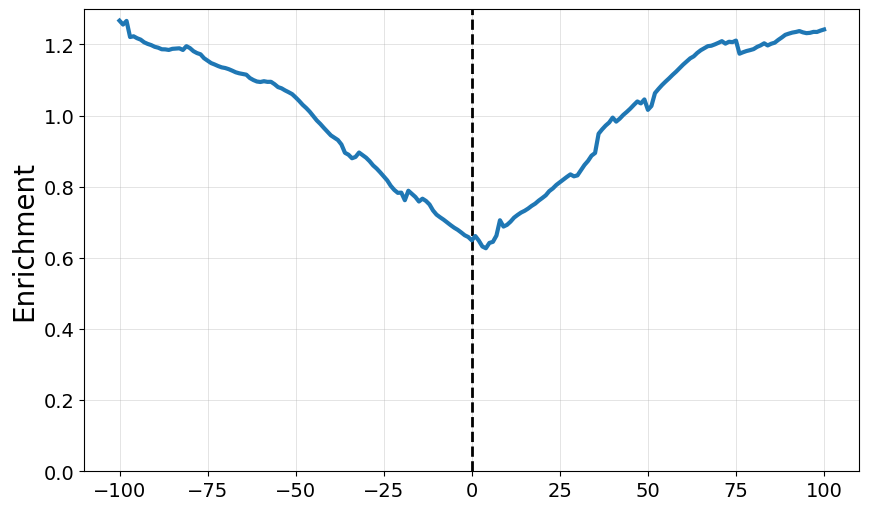

In [345]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))
sns.lineplot(
         data=total_counts_df,
         x="pos",
         y="enrichment",
         # linestyle='--',
         # color='black',
         lw=3.0,
         alpha=1.0,
         ax=ax,
         zorder=3,
        )
ax.tick_params(axis="both", labelsize=14)
ax.grid(lw=0.4, alpha=0.6, zorder=0)
ax.set_axisbelow(True)
ax.set_xlabel("")
ax.set_ylabel("Enrichment")
ax.yaxis.label.set_size(20)
ax.set_ylim(ymin=0)
ax.axvline(0, linestyle='--', color='black', lw=2.0, label="STR Start")
plt.show()
plt.close()

In [17]:
str_human_chrY = str_human[str_human["chromosome"] == "chrY"].rename(columns={"chromosome": "seqID"})
str_human_chrY.loc[:, "type"] = "STR"
str_human_chrY

,seqID,start,end,length,sru,consensus_repeats,consensus,sequence,type
#assembly_accession,,,,,,,,,
chm13v2.0.fa.gz,chrY,0,1998,1998,6,333,taaccc,taaccctaaccctaaccctaaccctaaccctaaccctaaccctaac...,STR
chm13v2.0.fa.gz,chrY,2008,2013,5,1,5,c,ccccc,STR
chm13v2.0.fa.gz,chrY,2010,2478,468,6,78,ccctaa,ccctaaccctaaccctaaccctaaccctaaccctaaccctaaccct...,STR
chm13v2.0.fa.gz,chrY,2478,3114,636,6,106,cctaac,cctaaccctaaccctaaccctaaccctaaccctaaccctaacccta...,STR
chm13v2.0.fa.gz,chrY,3113,3118,5,1,5,c,ccccc,STR
...,...,...,...,...,...,...,...,...,...
chm13v2.0.fa.gz,chrY,62456193,62456221,28,7,4,gggttag,gggttaggggttaggggttaggggttag,STR
chm13v2.0.fa.gz,chrY,62456214,62456262,48,6,8,gggtta,gggttagggttagggttagggttagggttagggttagggttagggtta,STR
chm13v2.0.fa.gz,chrY,62456269,62456290,21,7,3,gggttag,gggttaggggttaggggttag,STR


In [12]:
df_all = []
from tqdm import tqdm
for chromosome in tqdm(extended_avoidmers, total=24):
    temp = pd.read_csv(extended_avoidmers[chromosome], 
                     header=None, 
                     names=["seqID", "start", "end", "sequence", "length"]
                    )
    df_all.append(df)

df_all = pd.concat(df_all, axis=0)
df_all = df_all.merge(chrSizes, how="left", left_on="seqID", right_on="chromosome")
df_all

100%|██████████| 24/24 [00:03<00:00,  7.27it/s]


,seqID,start,end,sequence,length,#assembly_accession,chromosome,chrLen
0,chr1,6006,6066,ccagatgcaactgcccaatctcggacattccagctaccagtattgt...,60,chm13v2.0,chr1,248387328
1,chr1,12615,12676,ccttgaagcacccccaagggcatcttctcaaagttggatgtgtgca...,61,chm13v2.0,chr1,248387328
2,chr1,12616,12676,cttgaagcacccccaagggcatcttctcaaagttggatgtgtgcat...,60,chm13v2.0,chr1,248387328
3,chr1,21609,21674,tcacaatggaccaggccaactcagtcaatgtggaggcagcatcagg...,65,chm13v2.0,chr1,248387328
4,chr1,21610,21674,cacaatggaccaggccaactcagtcaatgtggaggcagcatcaggt...,64,chm13v2.0,chr1,248387328
...,...,...,...,...,...,...,...,...
3187304,chrY,62439239,62439299,ccacaaggtcaggagttcaataccagcctggccaagatggtgaaac...,60,chm13v2.0,chrY,62460029
3187305,chrY,62442141,62442201,aatacaaaaattagctgggcatggcggcacgtgcctgtaatcccag...,60,chm13v2.0,chrY,62460029
3187306,chrY,62444746,62444806,gaactatgtgacgaatgcacaagctttagtagccgatgcgatcaac...,60,chm13v2.0,chrY,62460029
3187307,chrY,62453292,62453353,tgcgttctgctcagtacagacctgggggtcaccgtaaaggtggagc...,61,chm13v2.0,chrY,62460029


In [16]:
df_centro_chrY = df_centro[df_centro["chromosome"] == "chrY"]
df_centro_chrY

,seqID,start,end,compartment,chromosome,chrLen
2234,chrY,21838,71778,censat,chrY,62460029
2235,chrY,92015,98020,censat,chrY,62460029
2236,chrY,112829,112908,censat,chrY,62460029
2237,chrY,205969,206747,censat,chrY,62460029
2238,chrY,271398,275248,censat,chrY,62460029
...,...,...,...,...,...,...
2518,chrY,62025776,62037362,censat,chrY,62460029
2519,chrY,62052955,62059882,censat,chrY,62460029
2520,chrY,62061431,62072743,hsat3,chrY,62460029
2521,chrY,62072743,62087298,bsat,chrY,62460029


In [49]:
df_centro_chrY_bed = BedTool.from_dataframe(df_centro_chrY[["seqID", "start", "end", "compartment"]])
df_centro_chrY_bed

<BedTool(/storage/home/nmc6088/scratch/pybedtools.ff1nrbsa.tmp)>

In [55]:
str_human_chrY[str_human_chrY['sru'] == 2418]['length'].max()

7254

In [ ]:
str_human_chrY_bed = BedTool.from_dataframe(str_human_chrY[["seqID", "start", "end"]])
str_human_chrY_bed

In [60]:
cov_df_all = []

for sru in tqdm(str_human_chrY.sru.unique(), total=str_human_chrY.sru.nunique(), position=0, leave=True):
    str_human_chrY_bed = BedTool.from_dataframe(str_human_chrY[str_human_chrY['sru'] == sru][["seqID", "start", "end"]])
    cov_df = pd.read_table(
                    df_centro_chrY_bed.coverage(str_human_chrY_bed).fn,
                    header=None,
                    names=["seqID", "start", "end", "compartment", "totalHits", "bpCovering", "compartmentLength", "coverage"]
        )
    cov_df.loc[:, "sru"] = sru
    cov_df_all.append(cov_df)
    
cov_df_all = pd.concat(cov_df_all, axis=0)
cov_df_all

100%|██████████| 70/70 [00:04<00:00, 15.19it/s]


,seqID,start,end,compartment,totalHits,bpCovering,compartmentLength,coverage,sru
0,chrY,21838,71778,censat,0,0,49940,0.0,6
1,chrY,92015,98020,censat,0,0,6005,0.0,6
2,chrY,112829,112908,censat,0,0,79,0.0,6
3,chrY,205969,206747,censat,0,0,778,0.0,6
4,chrY,271398,275248,censat,0,0,3850,0.0,6
...,...,...,...,...,...,...,...,...,...
284,chrY,62025776,62037362,censat,0,0,11586,0.0,3498
285,chrY,62052955,62059882,censat,0,0,6927,0.0,3498
286,chrY,62061431,62072743,hsat3,0,0,11312,0.0,3498
287,chrY,62072743,62087298,bsat,0,0,14555,0.0,3498


In [74]:
cutoff_chrY = cutoff[cutoff["chromosome"] == "chrY"]

In [77]:
cutoff_chrY

,chromosome,start,end,length,sru,consensus_repeats,consensus,sequence
#assembly_accession,,,,,,,,
chm13v2.0.fa.gz,chrY,0,1998,1998,6,333,taaccc,taaccctaaccctaaccctaaccctaaccctaaccctaaccctaac...
chm13v2.0.fa.gz,chrY,2010,2478,468,6,78,ccctaa,ccctaaccctaaccctaaccctaaccctaaccctaaccctaaccct...
chm13v2.0.fa.gz,chrY,2478,3114,636,6,106,cctaac,cctaaccctaaccctaaccctaaccctaaccctaaccctaacccta...
chm13v2.0.fa.gz,chrY,3115,3205,90,6,15,ccctaa,ccctaaccctaaccctaaccctaaccctaaccctaaccctaaccct...
chm13v2.0.fa.gz,chrY,3207,5205,1998,6,333,ccctaa,ccctaaccctaaccctaaccctaaccctaaccctaaccctaaccct...
...,...,...,...,...,...,...,...,...
chm13v2.0.fa.gz,chrY,62456193,62456221,28,7,4,gggttag,gggttaggggttaggggttaggggttag
chm13v2.0.fa.gz,chrY,62456214,62456262,48,6,8,gggtta,gggttagggttagggttagggttagggttagggttagggttagggtta
chm13v2.0.fa.gz,chrY,62456269,62456290,21,7,3,gggttag,gggttaggggttaggggttag


In [75]:
str_human_chrY_bed = BedTool.from_dataframe(cutoff_chrY[["chromosome", "start", "end"]])
cov_df = pd.read_table(
                df_centro_chrY_bed.coverage(str_human_chrY_bed).fn,
                header=None,
                names=["seqID", "start", "end", "compartment", "totalHits", "bpCovering", "compartmentLength", "coverage"]
    )
cov_df

,seqID,start,end,compartment,totalHits,bpCovering,compartmentLength,coverage
0,chrY,21838,71778,censat,0,0,49940,0.000000
1,chrY,92015,98020,censat,2,385,6005,0.064113
2,chrY,112829,112908,censat,1,10,79,0.126582
3,chrY,205969,206747,censat,1,111,778,0.142674
4,chrY,271398,275248,censat,1,240,3850,0.062338
...,...,...,...,...,...,...,...,...
284,chrY,62025776,62037362,censat,5,62,11586,0.005351
285,chrY,62052955,62059882,censat,3,50,6927,0.007218
286,chrY,62061431,62072743,hsat3,120,2018,11312,0.178395
287,chrY,62072743,62087298,bsat,0,0,14555,0.000000


<Axes: xlabel='compartment', ylabel='coveragePercentage'>

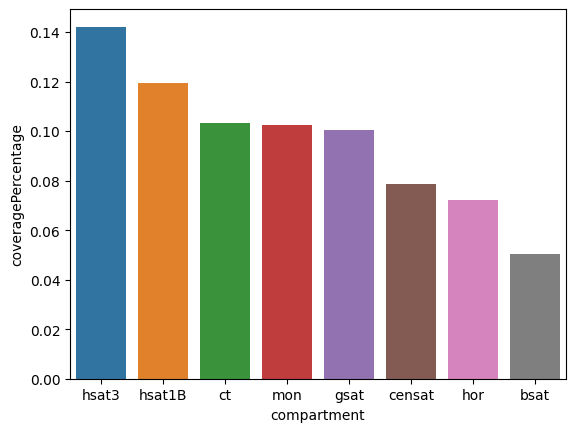

In [76]:
import seaborn as sns
cov_df_all = cov_df_all.groupby("compartment", as_index=False)\
                    .agg({"bpCovering": "sum", "compartmentLength": "sum"})\
                    .assign(coveragePercentage=lambda ds: 1e2 * ds['bpCovering'].div(ds['compartmentLength']))\
                    .sort_values(by=['coveragePercentage'], ascending=False)

sns.barplot(data=cov_df_all, capsize=0.2, x="compartment", y="coveragePercentage")

In [14]:
df_all_chrY = df_all[df_all["seqID"] == "chrY"]
df_chrY_df = pd.read_table(
            BedTool.from_dataframe(df_all_chrY[["seqID", "start", "end", "sequence"]]).sort().merge(c="4", o="distinct", delim="|").fn,
            header=None,
            names=["seqID", "start", "end", "sequence"]
)
df_chrY_df.loc[:, "type"] = "Avoidmer"
df_chrY_df

,seqID,start,end,sequence,type
0,chrY,17078,17144,agcagtccctccacttggttctgatccaggatgaagccggtgtaga...,Avoidmer
1,chrY,17627,17688,atgaacttggtgcagtaacacctgccgtttacctctggcctatcca...,Avoidmer
2,chrY,77078,77142,aaacggggtctgtacgcatcaggatccagccacgtccaaggctccc...,Avoidmer
3,chrY,90685,90748,ctgggatgacaggcgtgagccgctgcacccagccagccttaccatt...,Avoidmer
4,chrY,122704,122765,ctggggtcaagcgatctgcttgaaccaccattcccagccgagttgt...,Avoidmer
...,...,...,...,...,...
15373,chrY,62437076,62437137,cccaggttcaagcaattcttctgcctcagcctttggagtagctgtg...,Avoidmer
15374,chrY,62439239,62439299,ccacaaggtcaggagttcaataccagcctggccaagatggtgaaac...,Avoidmer
15375,chrY,62442141,62442201,aatacaaaaattagctgggcatggcggcacgtgcctgtaatcccag...,Avoidmer
15376,chrY,62444746,62444806,gaactatgtgacgaatgcacaagctttagtagccgatgcgatcaac...,Avoidmer


In [18]:
columns = ["seqID", "start", "end", "sequence", "type"]

human_chrY = pd.concat([df_chrY_df[columns], str_human_chrY[str_human_chrY['sru'] > 1][columns + ["sru"]]], axis=0)
human_chrY.sort_values(by=["start"], ascending=True, inplace=True)
human_chrY.reset_index(drop=True, inplace=True)
human_chrY.reset_index(inplace=True)
human_chrY

,index,seqID,start,end,sequence,type,sru
0,0,chrY,0,1998,taaccctaaccctaaccctaaccctaaccctaaccctaaccctaac...,STR,6.0
1,1,chrY,2010,2478,ccctaaccctaaccctaaccctaaccctaaccctaaccctaaccct...,STR,6.0
2,2,chrY,2478,3114,cctaaccctaaccctaaccctaaccctaaccctaaccctaacccta...,STR,6.0
3,3,chrY,3115,3205,ccctaaccctaaccctaaccctaaccctaaccctaaccctaaccct...,STR,6.0
4,4,chrY,3207,5205,ccctaaccctaaccctaaccctaaccctaaccctaaccctaaccct...,STR,6.0
...,...,...,...,...,...,...,...
288899,288899,chrY,62456193,62456221,gggttaggggttaggggttaggggttag,STR,7.0
288900,288900,chrY,62456214,62456262,gggttagggttagggttagggttagggttagggttagggttagggtta,STR,6.0
288901,288901,chrY,62456269,62456290,gggttaggggttaggggttag,STR,7.0
288902,288902,chrY,62456283,62456799,gggttagggttagggttagggttagggttagggttagggttagggt...,STR,6.0


In [19]:
human_chrY['type'].unique()

array(['STR', 'Avoidmer'], dtype=object)

In [37]:
df_centro_chrY.isna().sum()

seqID          0
start          0
end            0
compartment    0
chromosome     0
chrLen         0
dtype: int64

In [26]:
vals = df_centro_chrY.values
vals

array([['chrY', 21838, 71778, 'censat', 'chrY', 62460029],
       ['chrY', 92015, 98020, 'censat', 'chrY', 62460029],
       ['chrY', 112829, 112908, 'censat', 'chrY', 62460029],
       ...,
       ['chrY', 62061431, 62072743, 'hsat3', 'chrY', 62460029],
       ['chrY', 62072743, 62087298, 'bsat', 'chrY', 62460029],
       ['chrY', 62452320, 62453637, 'censat', 'chrY', 62460029]],
      dtype=object)

In [38]:
def find_compartment(start, end):
    global vals
    for comp in vals:

        comp_start = comp[1]
        comp_end = comp[2]

        if comp_start <= start and end <= comp_end:
            return comp[3]

    return None

In [43]:
first_avoidmer = None
from tqdm import tqdm
transitions = []

prev_comp = None
cur_idx = 0
for _, row in tqdm(human_chrY.iterrows(), total=human_chrY.shape[0], leave=True, position=0):

    typ = row['type']
    start = row['start']
    end = row['end']

    if first_avoidmer is None and typ != "Avoidmer":
        continue
    else:
        first_avoidmer = True


    # detect compartment
    comp = find_compartment(start, end)
    cur_comp = {
                "start": row["start"],
                "end": row["end"],
                "type": row["type"],
                "comp": comp
               }
    

    if prev_comp is None:
        prev_comp = cur_comp
        continue

    if cur_comp["type"] == "STR" and prev_comp["type"] == "STR":
        continue

        
    distance = cur_comp["start"] - prev_comp["end"]
    transitions.append({"transition": f"{prev_comp['type']}->{cur_comp['type']}",
                        "distance": distance,
                        "comp": f"{prev_comp['comp']}->{cur_comp['comp']}"
                       })
    # if prev_comp['type'] == "Avoidmer":
    #    print(transitions)
    #    break
    prev_comp = cur_comp
    
transitions = pd.DataFrame(transitions)
transitions    

100%|██████████| 288904/288904 [00:22<00:00, 13053.40it/s]


,transition,distance,comp
0,Avoidmer->Avoidmer,483,None->None
1,Avoidmer->STR,250,None->None
2,STR->STR,835,None->None
3,STR->STR,175,None->None
4,STR->STR,153,None->None
...,...,...,...
288847,STR->STR,7,None->None
288848,STR->STR,-7,None->None
288849,STR->STR,7,None->None
288850,STR->STR,-7,None->None


In [48]:
transitions[["transition", "comp"]].value_counts().reset_index()\
            .sort_values(by=["count"], ascending=False).head(40)

,transition,comp,count
0,STR->STR,hsat3->hsat3,107817
1,STR->STR,hsat1B->hsat1B,84291
2,STR->STR,None->None,43703
3,STR->STR,ct->ct,15252
4,STR->STR,censat->censat,6351
5,STR->Avoidmer,hsat1B->hsat1B,5622
6,Avoidmer->STR,hsat1B->hsat1B,5621
7,STR->Avoidmer,hsat3->hsat3,4900
8,Avoidmer->STR,hsat3->hsat3,4899
9,STR->Avoidmer,None->None,2437


In [437]:
human_chrY.iloc[1:, :].drop(columns=["index"]).reset_index(drop=True).reset_index()

,index,seqID,start,end,sequence,type,sru
0,0,chrY,2010,2478,ccctaaccctaaccctaaccctaaccctaaccctaaccctaaccct...,STR,6.0
1,1,chrY,2478,3114,cctaaccctaaccctaaccctaaccctaaccctaaccctaacccta...,STR,6.0
2,2,chrY,3115,3205,ccctaaccctaaccctaaccctaaccctaaccctaaccctaaccct...,STR,6.0
3,3,chrY,3207,5205,ccctaaccctaaccctaaccctaaccctaaccctaaccctaaccct...,STR,6.0
4,4,chrY,5206,5314,cctcaccctaaccctaaccctcaccctaaccctaaccctcacccta...,STR,18.0
...,...,...,...,...,...,...,...
288898,288898,chrY,62456193,62456221,gggttaggggttaggggttaggggttag,STR,7.0
288899,288899,chrY,62456214,62456262,gggttagggttagggttagggttagggttagggttagggttagggtta,STR,6.0
288900,288900,chrY,62456269,62456290,gggttaggggttaggggttag,STR,7.0
288901,288901,chrY,62456283,62456799,gggttagggttagggttagggttagggttagggttagggttagggt...,STR,6.0


In [438]:
human_chrY = human_chrY[(human_chrY['type'] == 'Avoidmer') | ((human_chrY['sru'] > 1) & (human_chrY['type'] == 'STR'))]
human_chrY

,index,seqID,start,end,sequence,type,sru
0,0,chrY,0,1998,taaccctaaccctaaccctaaccctaaccctaaccctaaccctaac...,STR,6.0
1,1,chrY,2010,2478,ccctaaccctaaccctaaccctaaccctaaccctaaccctaaccct...,STR,6.0
2,2,chrY,2478,3114,cctaaccctaaccctaaccctaaccctaaccctaaccctaacccta...,STR,6.0
3,3,chrY,3115,3205,ccctaaccctaaccctaaccctaaccctaaccctaaccctaaccct...,STR,6.0
4,4,chrY,3207,5205,ccctaaccctaaccctaaccctaaccctaaccctaaccctaaccct...,STR,6.0
...,...,...,...,...,...,...,...
288899,288899,chrY,62456193,62456221,gggttaggggttaggggttaggggttag,STR,7.0
288900,288900,chrY,62456214,62456262,gggttagggttagggttagggttagggttagggttagggttagggtta,STR,6.0
288901,288901,chrY,62456269,62456290,gggttaggggttaggggttag,STR,7.0
288902,288902,chrY,62456283,62456799,gggttagggttagggttagggttagggttagggttagggttagggt...,STR,6.0


In [439]:
human_chrY_merged = human_chrY.merge(human_chrY.iloc[1:, :]\
                                               .drop(columns=["index"])\
                                               .reset_index(drop=True)\
                                               .reset_index(),
                                     on="index",
                                     how="left"
                                    )
human_chrY_merged

,index,seqID_x,start_x,end_x,sequence_x,type_x,sru_x,seqID_y,start_y,end_y,sequence_y,type_y,sru_y
0,0,chrY,0,1998,taaccctaaccctaaccctaaccctaaccctaaccctaaccctaac...,STR,6.0,chrY,2010.0,2478.0,ccctaaccctaaccctaaccctaaccctaaccctaaccctaaccct...,STR,6.0
1,1,chrY,2010,2478,ccctaaccctaaccctaaccctaaccctaaccctaaccctaaccct...,STR,6.0,chrY,2478.0,3114.0,cctaaccctaaccctaaccctaaccctaaccctaaccctaacccta...,STR,6.0
2,2,chrY,2478,3114,cctaaccctaaccctaaccctaaccctaaccctaaccctaacccta...,STR,6.0,chrY,3115.0,3205.0,ccctaaccctaaccctaaccctaaccctaaccctaaccctaaccct...,STR,6.0
3,3,chrY,3115,3205,ccctaaccctaaccctaaccctaaccctaaccctaaccctaaccct...,STR,6.0,chrY,3207.0,5205.0,ccctaaccctaaccctaaccctaaccctaaccctaaccctaaccct...,STR,6.0
4,4,chrY,3207,5205,ccctaaccctaaccctaaccctaaccctaaccctaaccctaaccct...,STR,6.0,chrY,5206.0,5314.0,cctcaccctaaccctaaccctcaccctaaccctaaccctcacccta...,STR,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
288899,288899,chrY,62456193,62456221,gggttaggggttaggggttaggggttag,STR,7.0,chrY,62456214.0,62456262.0,gggttagggttagggttagggttagggttagggttagggttagggtta,STR,6.0
288900,288900,chrY,62456214,62456262,gggttagggttagggttagggttagggttagggttagggttagggtta,STR,6.0,chrY,62456269.0,62456290.0,gggttaggggttaggggttag,STR,7.0
288901,288901,chrY,62456269,62456290,gggttaggggttaggggttag,STR,7.0,chrY,62456283.0,62456799.0,gggttagggttagggttagggttagggttagggttagggttagggt...,STR,6.0
288902,288902,chrY,62456283,62456799,gggttagggttagggttagggttagggttagggttagggttagggt...,STR,6.0,chrY,62456800.0,62460028.0,gggttagggttagggttagggttagggttagggttagggttagggt...,STR,6.0


In [440]:
human_chrY_merged.loc[:, "transitions"] = human_chrY_merged["type_x"] + "->" + human_chrY_merged["type_y"]
human_chrY_merged

,index,seqID_x,start_x,end_x,sequence_x,type_x,sru_x,seqID_y,start_y,end_y,sequence_y,type_y,sru_y,transitions
0,0,chrY,0,1998,taaccctaaccctaaccctaaccctaaccctaaccctaaccctaac...,STR,6.0,chrY,2010.0,2478.0,ccctaaccctaaccctaaccctaaccctaaccctaaccctaaccct...,STR,6.0,STR->STR
1,1,chrY,2010,2478,ccctaaccctaaccctaaccctaaccctaaccctaaccctaaccct...,STR,6.0,chrY,2478.0,3114.0,cctaaccctaaccctaaccctaaccctaaccctaaccctaacccta...,STR,6.0,STR->STR
2,2,chrY,2478,3114,cctaaccctaaccctaaccctaaccctaaccctaaccctaacccta...,STR,6.0,chrY,3115.0,3205.0,ccctaaccctaaccctaaccctaaccctaaccctaaccctaaccct...,STR,6.0,STR->STR
3,3,chrY,3115,3205,ccctaaccctaaccctaaccctaaccctaaccctaaccctaaccct...,STR,6.0,chrY,3207.0,5205.0,ccctaaccctaaccctaaccctaaccctaaccctaaccctaaccct...,STR,6.0,STR->STR
4,4,chrY,3207,5205,ccctaaccctaaccctaaccctaaccctaaccctaaccctaaccct...,STR,6.0,chrY,5206.0,5314.0,cctcaccctaaccctaaccctcaccctaaccctaaccctcacccta...,STR,18.0,STR->STR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288899,288899,chrY,62456193,62456221,gggttaggggttaggggttaggggttag,STR,7.0,chrY,62456214.0,62456262.0,gggttagggttagggttagggttagggttagggttagggttagggtta,STR,6.0,STR->STR
288900,288900,chrY,62456214,62456262,gggttagggttagggttagggttagggttagggttagggttagggtta,STR,6.0,chrY,62456269.0,62456290.0,gggttaggggttaggggttag,STR,7.0,STR->STR
288901,288901,chrY,62456269,62456290,gggttaggggttaggggttag,STR,7.0,chrY,62456283.0,62456799.0,gggttagggttagggttagggttagggttagggttagggttagggt...,STR,6.0,STR->STR
288902,288902,chrY,62456283,62456799,gggttagggttagggttagggttagggttagggttagggttagggt...,STR,6.0,chrY,62456800.0,62460028.0,gggttagggttagggttagggttagggttagggttagggttagggt...,STR,6.0,STR->STR


In [507]:
human_chrY_merged.loc[:, "distance"] = human_chrY_merged["start_y"] - human_chrY_merged["end_x"]

In [508]:
distance = human_chrY_merged[human_chrY_merged["transitions"] == "Avoidmer->STR"]
distance

,index,seqID_x,start_x,end_x,sequence_x,type_x,sru_x,seqID_y,start_y,end_y,sequence_y,type_y,sru_y,transitions,distance
52,52,chrY,17627,17688,atgaacttggtgcagtaacacctgccgtttacctctggcctatcca...,Avoidmer,NaN,chrY,17938.0,17946.0,caaacaaa,STR,4.0,Avoidmer->STR,250.0
106,106,chrY,77078,77142,aaacggggtctgtacgcatcaggatccagccacgtccaaggctccc...,Avoidmer,NaN,chrY,77180.0,77188.0,gcctgcct,STR,4.0,Avoidmer->STR,38.0
164,164,chrY,90685,90748,ctgggatgacaggcgtgagccgctgcacccagccagccttaccatt...,Avoidmer,NaN,chrY,90713.0,90721.0,ccagccag,STR,4.0,Avoidmer->STR,-35.0
257,257,chrY,122704,122765,ctggggtcaagcgatctgcttgaaccaccattcccagccgagttgt...,Avoidmer,NaN,chrY,123174.0,123190.0,gagggagggagggagg,STR,4.0,Avoidmer->STR,409.0
278,278,chrY,131001,131064,aatataaaaaattagccaggcatggtggtgggggcctgtagtccca...,Avoidmer,NaN,chrY,131023.0,131032.0,tggtggtgg,STR,3.0,Avoidmer->STR,-41.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288790,288790,chrY,62437076,62437137,cccaggttcaagcaattcttctgcctcagcctttggagtagctgtg...,Avoidmer,NaN,chrY,62437837.0,62437846.0,cctcctcct,STR,3.0,Avoidmer->STR,700.0
288793,288793,chrY,62439239,62439299,ccacaaggtcaggagttcaataccagcctggccaagatggtgaaac...,Avoidmer,NaN,chrY,62439493.0,62439501.0,aaagaaag,STR,4.0,Avoidmer->STR,194.0
288807,288807,chrY,62442141,62442201,aatacaaaaattagctgggcatggcggcacgtgcctgtaatcccag...,Avoidmer,NaN,chrY,62442336.0,62442344.0,tttctttc,STR,4.0,Avoidmer->STR,135.0
288814,288814,chrY,62444746,62444806,gaactatgtgacgaatgcacaagctttagtagccgatgcgatcaac...,Avoidmer,NaN,chrY,62444823.0,62444831.0,aatgaatg,STR,4.0,Avoidmer->STR,17.0


In [547]:
distance.sru_y.value_counts().to_frame(name="sru")

,sru
sru_y,
3.0,6255
5.0,5013
4.0,2930
2.0,568
6.0,17
7.0,2
20.0,2
27.0,1
53.0,1


<Axes: xlabel='sru_y', ylabel='counts'>

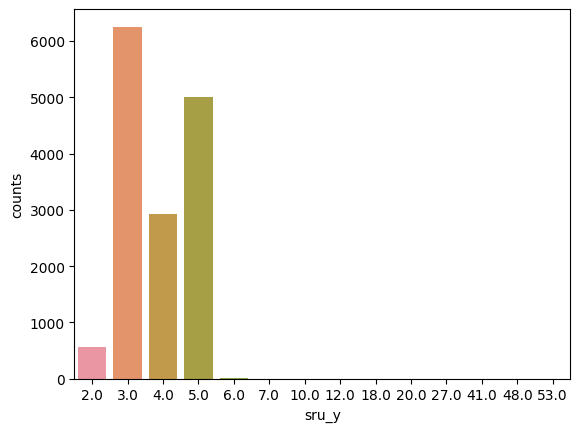

In [548]:
sns.barplot(data=distance.sru_y.value_counts().to_frame(name="counts").reset_index(), x="sru_y", y="counts")

(-130.0, 5000.0)

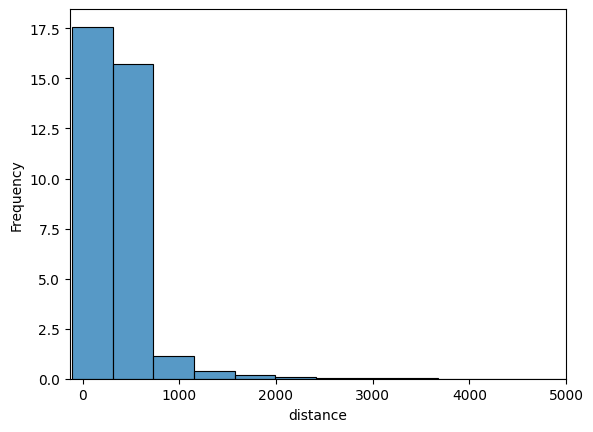

In [541]:
sns.histplot(data=distance, x="distance", bins=40, stat="frequency")
ax = plt.gca()
ax.set_xlim(xmin=-130, xmax=5000)

In [441]:
human_chrY_merged["transitions"].value_counts()

transitions
STR->STR              258731
STR->Avoidmer          14794
Avoidmer->STR          14794
Avoidmer->Avoidmer       584
Name: count, dtype: int64

In [ ]:
human_chrY_merged[human_chrY_merged